In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df_training = pd.read_csv("train_motion_data.csv")
df_test = pd.read_csv("test_motion_data.csv")

df_training


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


We have 7 quantitative values and 1 categorical value

Accelerometer Units: $m/s^2$

Gyroscope Units: $rad/s$

For these type of problem we want to know a category (In this case class of driver), so we want classification models.

In [34]:
df_training.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [35]:
observations, variables = df_training.shape

print(f"Observations: {observations}, Variables: {variables}")

Observations: 3644, Variables: 8


## Describe the data

In [36]:
X = df_training.drop(columns="Class")
y = df_training.Class

In [37]:
X.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


Seeing the min and max values of each type of variable and the different type of units our variables use, we probably should normalize our data for our problem

In [38]:
print(y.unique())
print(y.value_counts())

normal_count, aggressive_count, slow_count = y.value_counts()

Ntotal = normal_count + aggressive_count + slow_count

print(f"Proportion of Normal is {(normal_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Aggressive is {(aggressive_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Slow is {(slow_count / Ntotal) * 100:0.1f}%")

['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64
Proportion of Normal is 36.5%
Proportion of Aggressive is 32.9%
Proportion of Slow is 30.5%


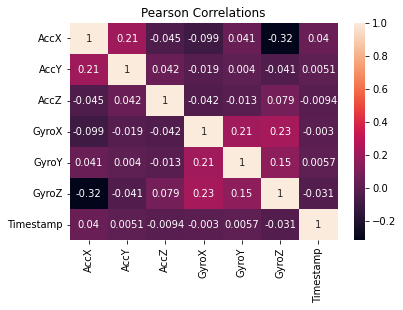

In [39]:
# Calculate correlation between variables
ax = sns.heatmap(df_training.corr(), annot=True).set(title='Pearson Correlations');

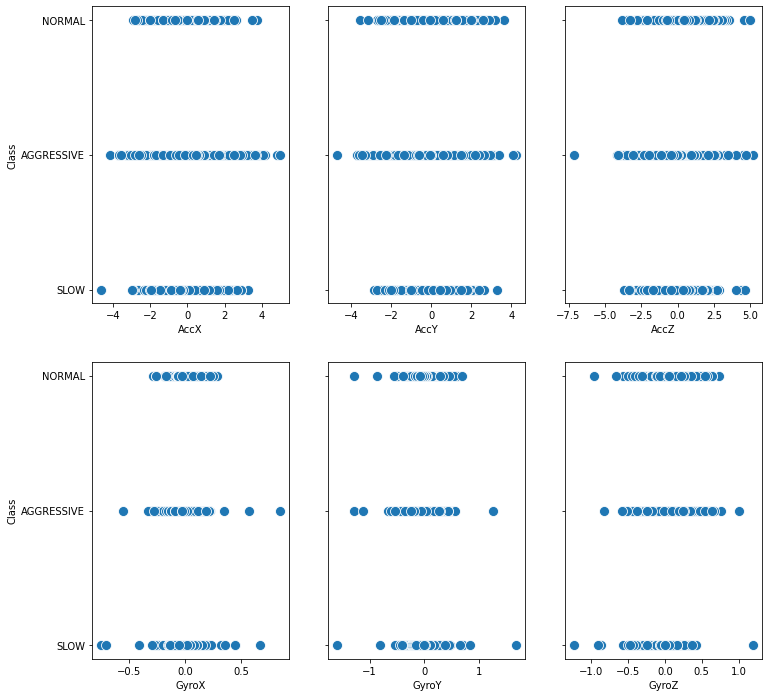

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharey=True)
#fig.suptitle('Scatter plots')

sns.scatterplot(ax=axes[0,0], data=df_training, x="AccX", y="Class", s=100)

sns.scatterplot(ax=axes[0,1], data=df_training, x="AccY", y="Class", s=100)

sns.scatterplot(ax=axes[0, 2], data=df_training, x="AccZ", y="Class", s=100)

sns.scatterplot(ax=axes[1, 0], data=df_training, x="GyroX", y="Class", s=100)

sns.scatterplot(ax=axes[1, 1], data=df_training, x="GyroY", y="Class", s=100)

sns.scatterplot(ax=axes[1, 2], data=df_training, x="GyroZ", y="Class", s=100)

plt.show()


<AxesSubplot:xlabel='AccX', ylabel='AccY'>

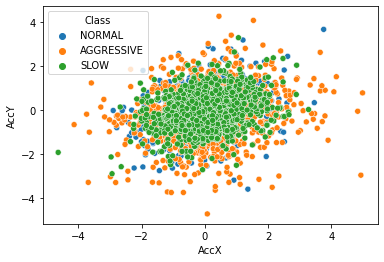

In [41]:
sns.scatterplot(data=df_training, x="AccX", y="AccY", hue="Class")

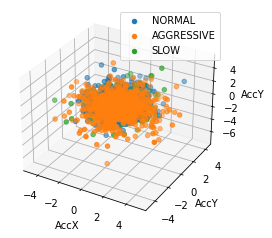

In [42]:
#%matplotlib nbagg
#%matplotlib ipympl

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df_training.Class.unique():
    ax.scatter3D(df_training.AccX[df_training.Class == s], df_training.AccY[df_training.Class == s], df_training.AccZ[df_training.Class == s],label=s)

ax.set_xlabel('AccX')
ax.set_ylabel('AccY')
ax.set_zlabel('AccY')

ax.legend()

<AxesSubplot:xlabel='GyroX', ylabel='GyroY'>

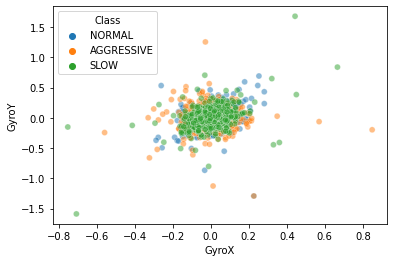

In [43]:
sns.scatterplot(data=df_training, x="GyroX", y="GyroY", hue="Class", alpha=0.5)

<AxesSubplot:xlabel='GyroX', ylabel='GyroZ'>

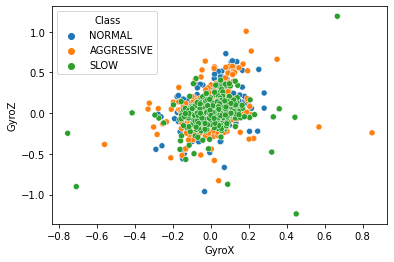

In [44]:
sns.scatterplot(data=df_training, x="GyroX", y="GyroZ", hue="Class")

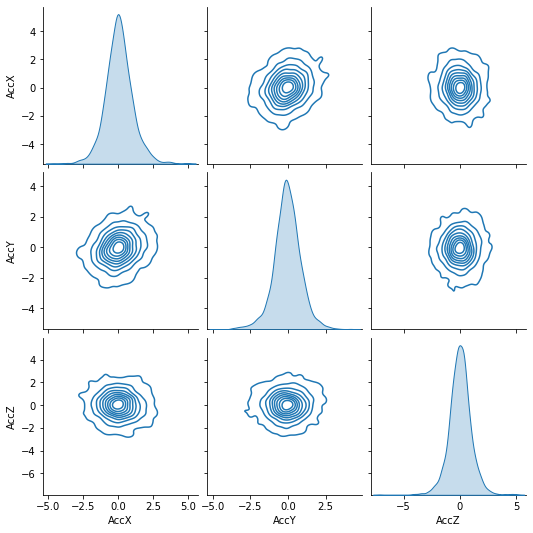

In [31]:
sns.pairplot(df_training[["AccX", "AccY", "AccZ", "Class"]], kind='kde')

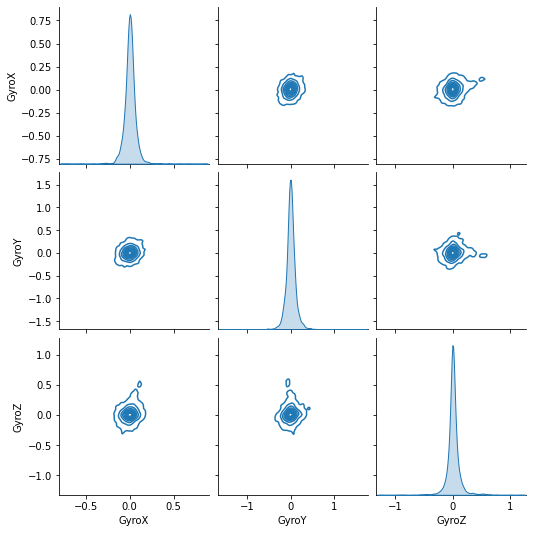

In [45]:
sns.pairplot(df_training[["GyroX", "GyroY", "GyroZ", "Class"]], kind='kde')

Seeing the histograms in the pairplots it could be that the data is normalized but we have to do a test to prove this

### Check the type of distribution

$H0$ : Our data is normal

Confidence level $\alpha$: $95\%$

if our p-value is bigger than $1 - \alpha = 0.05%$, the nul hypothesis is accepted, else is rejected

Based on these graphs we can probably know that a logistic regression model would not help us predict the type of driver too well. Our scatterplot based on the Class variable can be the one that shows us these conclusion the most, because all the data is concentrated in one part for any type of driver.

In [46]:
import scipy.stats

test_kolmogorov = scipy.stats.kstest(df_training.AccX, 'norm')
test_kolmogorov

KstestResult(statistic=0.045950008466853653, pvalue=4.000398639336288e-07)

Our p-value is less than $<0.05$ so our $H0$ is rejected

#### Conclusion on the graphs
Based on these graphs we can probably know that a logistic regression model would not help us predict the type of driver too well. Our scatterplot based on the Class variable can be the one that shows us these conclusion the most, because all the data is concentrated in one part for any type of driver.

<AxesSubplot:xlabel='AccX'>

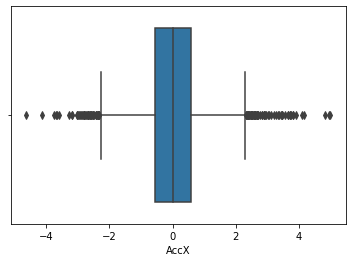

In [47]:
sns.boxplot(x=df_training.AccX)

<AxesSubplot:xlabel='AccY'>

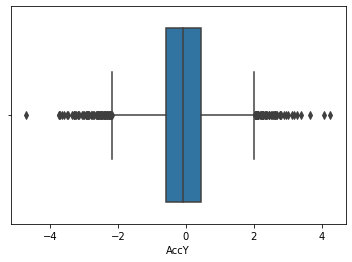

In [48]:
sns.boxplot(x=df_training.AccY)

<AxesSubplot:xlabel='GyroX'>

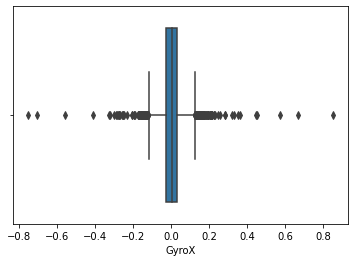

In [49]:
sns.boxplot(x=df_training.GyroX)

<AxesSubplot:xlabel='GyroY'>

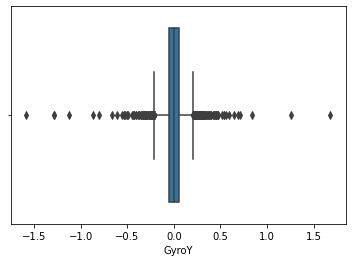

In [50]:
sns.boxplot(x=df_training.GyroY)

It seems we have a lot of atypical data, so maybe we should remove it or maybe we should check what type of distribution our data has, to know if having atypical data is something normal (like exponential distribution)

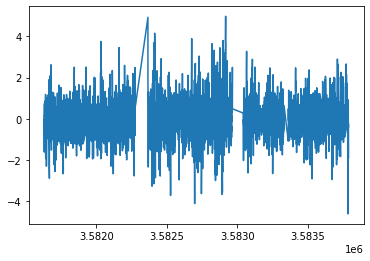

In [51]:
plt.plot(df_training.Timestamp, df_training.AccX)

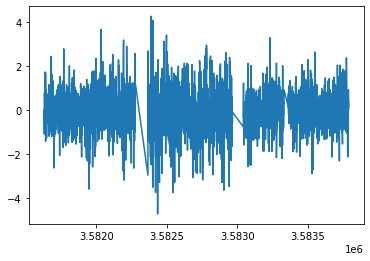

In [52]:
plt.plot(df_training.Timestamp, df_training.AccY)

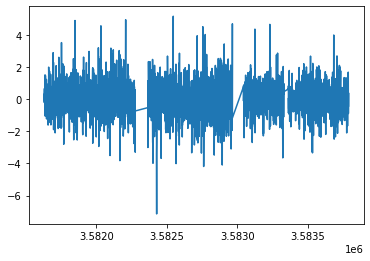

In [53]:
plt.plot(df_training.Timestamp, df_training.AccZ)

It seems our acceleration is very sporadic, but these alone doesn't tell us to much

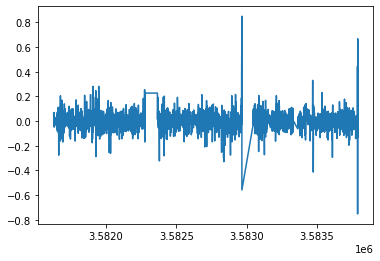

In [54]:
plt.plot(df_training.Timestamp, df_training.GyroX)

## Conclusion

At the end of the exploration of the data we can draw some conclusion:
-   We should probably normalize our data to train it
-   The timestamp variable doesn't seem to help for our problem and would probably affect training, so we should remove it
-   A random forest model would probably be possible to apply for these problem because we don't have the type data that would let us make decisions based on yes or no, because here to make a decision we have to see multiple points, we have to see a history of the driving of a person
-   Seeing our graphs, and more the scatterplot based on the class type, we can probably say that a logistic regression model would probably not give us perfect results
-   Understanding the gyroscope and Accelerometer better would give us more information to know which variables are the ones we need